#  For Google Colab

In [2]:
!pip install tensorflow-gpu==2.3.0 

In [3]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/25593/1931529/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1614980605&Signature=jiagUVCJSwgybPE3F0T30Ryeu9%2FcVGnJRd6sRK8jLg85W9pLS1oj5J0LxoEYQQssAyMUhED8pK04ffzoZUVU1ohTQ5PBG3m065vJ9FzsAPc2q5Mlxu1jyHA%2BcnySoxld5g2tNpGbWYHvDqteCFzN5%2F3zaK6yFahMo86FRTyQaf6%2FJ3%2BMY8jl2mSuc0U%2FzPDhRarvje039LGvXgRCloN2UjqFJFFrjbnJDnB8Kyob%2BwuYN5bPvbgMazN0Bvcqa1URH10CjCvYqCQcM99c7zIy7Hlj8kqbqrsDHQIxEmG2i5QckwdK%2BUQ3E2Ybf%2BsQLpqmQ57%2BglYsxnnPYz%2BDx%2BebWQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dai6-dl-cohort-6-challenge.zip" -c -O 'ai6-dl-cohort-6-challenge.zip'

--2021-03-02 21:54:35--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/25593/1931529/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1614980605&Signature=jiagUVCJSwgybPE3F0T30Ryeu9%2FcVGnJRd6sRK8jLg85W9pLS1oj5J0LxoEYQQssAyMUhED8pK04ffzoZUVU1ohTQ5PBG3m065vJ9FzsAPc2q5Mlxu1jyHA%2BcnySoxld5g2tNpGbWYHvDqteCFzN5%2F3zaK6yFahMo86FRTyQaf6%2FJ3%2BMY8jl2mSuc0U%2FzPDhRarvje039LGvXgRCloN2UjqFJFFrjbnJDnB8Kyob%2BwuYN5bPvbgMazN0Bvcqa1URH10CjCvYqCQcM99c7zIy7Hlj8kqbqrsDHQIxEmG2i5QckwdK%2BUQ3E2Ybf%2BsQLpqmQ57%2BglYsxnnPYz%2BDx%2BebWQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dai6-dl-cohort-6-challenge.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.20.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 311519931 (297M) [application/zip]
Saving to: ‘ai6-dl-cohort-6-ch

In [5]:
!unzip ai6-dl-cohort-6-challenge.zip

Streaming output truncated to the last 5000 lines.
  inflating: flower_data/train/37/image_03816.jpg  
  inflating: flower_data/train/37/image_03817.jpg  
  inflating: flower_data/train/37/image_03818.jpg  
  inflating: flower_data/train/37/image_03819.jpg  
  inflating: flower_data/train/37/image_03823.jpg  
  inflating: flower_data/train/37/image_03824.jpg  
  inflating: flower_data/train/37/image_03825.jpg  
  inflating: flower_data/train/37/image_03826.jpg  
  inflating: flower_data/train/37/image_03827.jpg  
  inflating: flower_data/train/37/image_07285.jpg  
  inflating: flower_data/train/37/image_07286.jpg  
  inflating: flower_data/train/37/image_07287.jpg  
  inflating: flower_data/train/37/image_07288.jpg  
  inflating: flower_data/train/37/image_07289.jpg  
  inflating: flower_data/train/37/image_07290.jpg  
  inflating: flower_data/train/37/image_07291.jpg  
  inflating: flower_data/train/37/image_07292.jpg  
  inflating: flower_data/train/37/image_07293.jpg  
  inflating: 

In [6]:
!ls

ai6-dl-cohort-6-challenge.zip  flower_data  sample_data


# import needed libraries

In [7]:
import os
import re
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.image as mpimg
import seaborn as sns

import tensorflow as tf
from tensorflow import keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, BatchNormalization, Dense, Conv2D, MaxPooling2D, Flatten, Activation
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adamax


from keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator

from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score, RandomizedSearchCV 

In [8]:
# Ensure Reproducibility

def seed_everything(seed):
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    
seed_everything(42)

# View Data with matplotlib

## Read the data

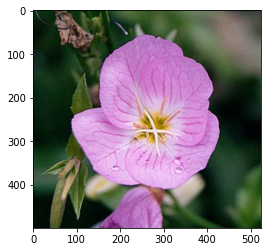

In [16]:
# viewing a train image
img = matplotlib.image.imread('/content/flower_data/train/1/image_06734.jpg')
plt.imshow(img)

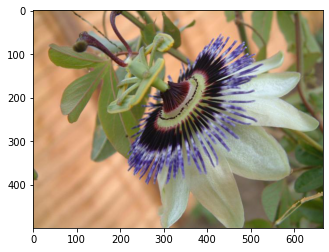

In [17]:
# reading the test images

t_img = matplotlib.image.imread('/content/flower_data/test/image_00059.jpg')
plt.imshow(t_img)

# Image preprocessing

- Standardizing

In [18]:
# from tensorflow.keras.applications.xception import preprocess_input

def prep(x):
  return preprocess_input(x)

In [19]:
'''IMG_WIDTH=224
IMG_HEIGHT=224


def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r'/content/flower_data/train')'''

"IMG_WIDTH=224\nIMG_HEIGHT=224\n\n\ndef create_dataset(img_folder):\n   \n    img_data_array=[]\n    class_name=[]\n   \n    for dir1 in os.listdir(img_folder):\n        for file in os.listdir(os.path.join(img_folder, dir1)):\n       \n            image_path= os.path.join(img_folder, dir1,  file)\n            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)\n            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)\n            image=np.array(image)\n            image = image.astype('float32')\n            image /= 255 \n            img_data_array.append(image)\n            class_name.append(dir1)\n    return img_data_array, class_name\n# extract the image array and class name\nimg_data, class_name =create_dataset(r'/content/flower_data/train')"

In [20]:
'''from imutils import paths

test = []

imagepath = list(paths.list_images('/content/flower_data/test'))

for image in imagepath:
  image = cv2.imread(image)
  image = cv2.resize(image, (224, 224))
  test.append(image)

test = np.array(test) / 255'''

"from imutils import paths\n\ntest = []\n\nimagepath = list(paths.list_images('/content/flower_data/test'))\n\nfor image in imagepath:\n  image = cv2.imread(image)\n  image = cv2.resize(image, (224, 224))\n  test.append(image)\n\ntest = np.array(test) / 255"

In [21]:
#class_name = [int(x) for x in class_name]

#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(img_data, class_name, test_size=0.2, random_state=42, stratify=class_name)

In [22]:
#X_train =  np.array(X_train, np.float32) / 255
#y_train = np.array(y_train, np.float32)
#X_test = np.array(X_test, np.float32) / 255
#y_test = np.array(y_test, np.float32)

In [23]:
#len(np.unique(y_test))

In [24]:
#from tensorflow.keras.utils import to_categorical

#y_train = to_categorical(y_train - 1)
#y_test = to_categorical(y_test - 1)



In [25]:
#np.argmax(y_train[0:15], axis=1)

In [26]:
#train = tf.keras.preprocessing.image_dataset_from_directory('train', seed=42, image_size=(500, 500))

In [27]:
traingen = ImageDataGenerator(rescale=1./255, validation_split=0.20, horizontal_flip=True, shear_range=0.2, zoom_range=0.2, height_shift_range=0.2, preprocessing_function=prep) # re scaling for image normalizarion

trainaug = ImageDataGenerator()
valaug = ImageDataGenerator()
testgen = ImageDataGenerator(rescale=1./255, preprocessing_function=prep)

In [28]:
train_generator = traingen.flow_from_directory('/content/flower_data/train', classes=[str(x) for  x in range(1,103)], target_size= (224, 224), batch_size=32, class_mode='categorical', subset='training')

#train = trainaug.flow(X_train, y_train, batch_size=32)

Found 5283 images belonging to 102 classes.


In [29]:
val_generator = traingen.flow_from_directory('/content/flower_data/train', target_size=(224, 224), classes = [str(x) for  x in range(1,103)], batch_size=32, class_mode='categorical', subset='validation')

#val = valaug.flow(X_test, y_test, batch_size=32)

Found 1269 images belonging to 102 classes.


In [31]:
test_generator = testgen.flow_from_directory('/content/flower_data/new', target_size=(224, 224), batch_size=32, class_mode=None, shuffle=False)

#testing = testgen.flow(test, batch_size=32, shuffle=False)

Found 818 images belonging to 1 classes.


In [32]:

#test_generator.samples


# Model Building with CNN

- Model building
- Model Optimization with RandomizedSearchCV
- Cross Validation with cross_val_score

In [33]:
prepr_layer = Sequential()
prepr_layer.add(keras.layers.experimental.preprocessing.RandomContrast(0.1))
prepr_layer.add(keras.layers.experimental.preprocessing.RandomRotation(0.1))
prepr_layer.add(keras.layers.experimental.preprocessing.RandomHeight(0.1))
prepr_layer.add(keras.layers.experimental.preprocessing.RandomWidth(0.1))
prepr_layer.add(keras.layers.experimental.preprocessing.RandomCrop(64,64))
prepr_layer.add(keras.layers.experimental.preprocessing.RandomFlip('horizontal'))

In [34]:
model = Sequential()

#model.add(keras.layers.experimental.preprocessing.RandomFlip('horizontal'))
#model.add(keras.layers.experimental.preprocessing.RandomContrast(0.5))
#model.add(keras.layers.experimental.preprocessing.RandomCrop(64,64))

#model.add(prepr_layer)

model.add(Conv2D(32, (3,3), input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Conv2D(32, (3,3)))

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(32, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Conv2D(32, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Conv2D(32, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.5))

model.add(Dense(102, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
batch_size = 32

callback = []

callback += [tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')]

callback += [tf.keras.callbacks.ModelCheckpoint('model.h5', save_best_only=True, mode='min')]

model.fit(train_generator, steps_per_epoch=train_generator.samples// batch_size, epochs=100, callbacks=callback, validation_data=val_generator, validation_steps=val_generator.samples//batch_size)

#model.fit(train, steps_per_epoch=len(X_train)// batch_size, validation_data=val, epochs=100, callbacks=callback, validation_steps=len(X_test)//batch_size)

Epoch 1/100
165/165 [==============================] - 34s 208ms/step - loss: 3.7803 - accuracy: 0.1209 - val_loss: 4.8530 - val_accuracy: 0.0377
Epoch 2/100
165/165 [==============================] - 34s 206ms/step - loss: 2.9756 - accuracy: 0.2226 - val_loss: 4.5814 - val_accuracy: 0.0641
Epoch 3/100
165/165 [==============================] - 34s 207ms/step - loss: 2.5096 - accuracy: 0.3237 - val_loss: 3.2991 - val_accuracy: 0.2027
Epoch 4/100
165/165 [==============================] - 34s 207ms/step - loss: 2.2591 - accuracy: 0.3851 - val_loss: 3.0732 - val_accuracy: 0.2660
Epoch 5/100
165/165 [==============================] - 34s 207ms/step - loss: 2.0523 - accuracy: 0.4233 - val_loss: 2.5151 - val_accuracy: 0.3349
Epoch 6/100
165/165 [==============================] - 34s 207ms/step - loss: 1.8340 - accuracy: 0.4769 - val_loss: 2.4901 - val_accuracy: 0.3470
Epoch 7/100
165/165 [==============================] - 34s 207ms/step - loss: 1.6753 - accuracy: 0.5170 - val_loss: 2.9061 -

# Model Building with Transfer learning

- Model Building with Vggnet 16
- Model Optimization with randomized search cv
- cross validation with cross_val_score

In [78]:
# load the base of Xception

pt_base = tf.keras.applications.Xception(
    include_top=False, weights='imagenet', pooling='max', input_shape=(224, 224, 3))

#pt_base.trainable = True


In [102]:
# attach the head

tf_model = Sequential()

# data augumentation
#tf_model.add(keras.layers.experimental.preprocessing.RandomFlip('horizontal'))
#tf_model.add(keras.layers.experimental.preprocessing.RandomContrast(0.5))
#tf_model.add(keras.layers.experimental.preprocessing.RandomCrop(64,64))

tf_model.add(pt_base)

tf_model.add(Flatten())

tf_model.add(Dense(128, activation='relu'))

tf_model.add(Dropout(0.5))
tf_model.add(Dense(102, activation='softmax'))

#print(tf_model.summary())

tf_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

callback = []
def decay(epoch):
    """ This method create the alpha"""
    return 0.001 / (1 + 1 * 30)


# callback += [tf.keras.callbacks.LearningRateScheduler(decay, verbose=1)]
callback += [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                   factor=0.25,
                                   patience=1,
                                   cooldown=2,
                                   verbose=1)]
callback += [tf.keras.callbacks.ModelCheckpoint('flowers.h5', save_best_only=True, mode='min')]

callback += [tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')]

In [103]:
batch_size = 32

tf_model.fit(train_generator, steps_per_epoch=train_generator.samples// batch_size, epochs=100, callbacks=callback, validation_data=val_generator, validation_steps=val_generator.samples//batch_size)

#tf_model.fit(train, steps_per_epoch=len(X_train)// batch_size, validation_data=val, epochs=100, callbacks=callback, validation_steps=len(X_test)//batch_size)

#tf_model.fit(X_train, y_train,  validation_data=(X_test, y_test),  epochs=5, callbacks=callback)

Epoch 1/100
165/165 [==============================] - 132s 802ms/step - loss: 1.2125 - accuracy: 0.7490 - val_loss: 0.9162 - val_accuracy: 0.7941
Epoch 2/100
165/165 [==============================] - ETA: 0s - loss: 0.4997 - accuracy: 0.8899
Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
165/165 [==============================] - 130s 789ms/step - loss: 0.4997 - accuracy: 0.8899 - val_loss: 1.4044 - val_accuracy: 0.7324
Epoch 3/100
165/165 [==============================] - 131s 793ms/step - loss: 0.1944 - accuracy: 0.9547 - val_loss: 0.2288 - val_accuracy: 0.9463
Epoch 4/100
165/165 [==============================] - ETA: 0s - loss: 0.0986 - accuracy: 0.9791
Epoch 00004: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
165/165 [==============================] - 130s 790ms/step - loss: 0.0986 - accuracy: 0.9791 - val_loss: 0.4570 - val_accuracy: 0.9087
Epoch 5/100
165/165 [==============================] - 131s 793ms/step - loss: 0.07

# Load model

In [81]:
new_model = keras.models.load_model('/content/flowers.h5')

In [82]:
name = list(os.listdir('/content/flower_data/new/test'))

In [83]:
name = sorted(name)


In [84]:
pred = new_model.predict(test_generator, batch_size=32)

In [85]:
pred.shape

(818, 102)

In [86]:

ans = np.argmax(pred, axis=1)

In [87]:
ans[0:15]

array([76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76])

In [88]:
ans = ans + 1

In [89]:
np.min(ans)

1

In [90]:
pred_dict = {x:y for x,y in zip(name, ans)}

In [91]:
#pred_dict

In [92]:
sample = pd.read_csv('flower_data/Sample_Sub.csv')

In [93]:
sample.head()

,id,class
0,image_03785.jpg,0
1,image_07662.jpg,0
2,image_04393.jpg,0
3,image_05361.jpg,0
4,image_05759.jpg,0


In [94]:
#sample['id'] = name
#sample['class'] = ans

In [95]:
sample['class'] = sample['id'].apply(lambda x: pred_dict[x])

In [96]:
sample.head(10)

,id,class
0,image_03785.jpg,37
1,image_07662.jpg,96
2,image_04393.jpg,36
3,image_05361.jpg,22
4,image_05759.jpg,13
5,image_00554.jpg,88
6,image_02100.jpg,75
7,image_06847.jpg,24
8,image_04235.jpg,52
9,image_05898.jpg,63


In [97]:
sample['class'].value_counts()

88    26
51    24
77    23
76    20
81    18
      ..
7      1
6      1
14     1
27     1
31     1
Name: class, Length: 102, dtype: int64

In [98]:
sample.head()

,id,class
0,image_03785.jpg,37
1,image_07662.jpg,96
2,image_04393.jpg,36
3,image_05361.jpg,22
4,image_05759.jpg,13


In [99]:
sample.to_csv('submission.csv', index=False)

In [100]:
!ls

ai6-dl-cohort-6-challenge.zip  flowers2.h5  flowers.h5	 submission.csv
flower_data		       flowers3.h5  sample_data  xf.csv
